<a href="https://colab.research.google.com/github/chen-star/llm_model_trainings/blob/main/explore_position_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✈ Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

# [0] 📁 Import GPT-2 Model Position Embedding Matrix

In [2]:
from transformers import GPT2Model
gpt2 = GPT2Model.from_pretrained('gpt2')
gpt2

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [3]:
position_embedding_matrix = gpt2.wpe.weight.detach().numpy()

In [4]:
print(f"Shape of position_embedding_matrix: {position_embedding_matrix.shape}")
print(f"Number of positions (rows) (context window length): {position_embedding_matrix.shape[0]}")
print(f"Embedding dimension (columns): {position_embedding_matrix.shape[1]}")

Shape of position_embedding_matrix: (1024, 768)
Number of positions (rows) (context window length): 1024
Embedding dimension (columns): 768


# [1] ♈ Cosine Similarity of Embedding Vectors for a word at different positions

In [5]:
paragraph_text = """
The morning light streamed through the window, a soft, golden light.
It brought a sense of warmth and clarity, illuminating the dust motes dancing in the air.
The faint light promised a new day, a fresh start.
Even in the dimmest corners, a glimmer of light seemed to penetrate, offering hope.
The light in her eyes was a beacon of determination.
"""

target_token = " light"

#### Tokenzie the `paragraph_text` and find all positions for the `target_token`

In [6]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode the paragraph_text into a sequence of token IDs
encoded_paragraph = tokenizer.encode(paragraph_text)

# Get the token ID for the token ' light'
target_token_id = tokenizer.encode(target_token)[0]

# Find all occurrences of the ' light' token ID in the tokenized sequence
target_token_positions = [
    i for i, token_id in enumerate(encoded_paragraph) if token_id == target_token_id
]
print(f"Positions of '{target_token}' token: {target_token_positions}")
print(f"'{target_token}' appears {len(target_token_positions)} times")

Positions of ' light' token: [3, 13, 40, 64, 75]
' light' appears 5 times


#### Extract embedding vectors

In [7]:
target_token_position_embeddings = []

for position in target_token_positions:
    embedding_vector = position_embedding_matrix[position]
    target_token_position_embeddings.append(embedding_vector)

# Convert the list of embeddings to a NumPy array
target_token_position_embeddings_array = np.array(target_token_position_embeddings)

print(f"Shape of target_token_position_embeddings: {target_token_position_embeddings_array.shape}")

Shape of target_token_position_embeddings: (5, 768)


#### Calculate the consine similarity for these embedding vectors

In [8]:
# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(target_token_position_embeddings_array)

print(f"Cosine Similarity Matrix for '{target_token}' position embeddings:")
print(cosine_sim_matrix)

Cosine Similarity Matrix for ' light' position embeddings:
[[1.0000002  0.8280569  0.47436014 0.35102814 0.33292767]
 [0.8280569  1.0000001  0.70549846 0.4303925  0.3428912 ]
 [0.47436014 0.70549846 0.99999994 0.84799117 0.73640025]
 [0.35102814 0.4303925  0.84799117 1.         0.973563  ]
 [0.33292767 0.3428912  0.73640025 0.973563   1.        ]]


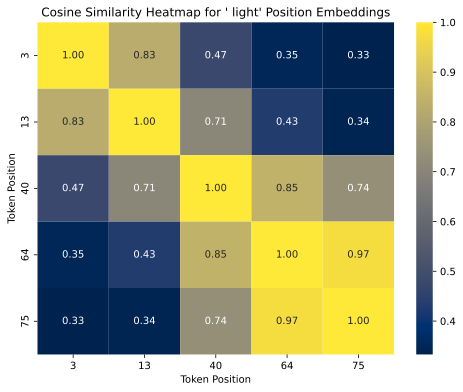


--- Explanation of the Heatmap for ' light' Position Embeddings ---
This heatmap visualizes the cosine similarity between the position embeddings of the token ' light' at its various occurrences in the paragraph.
The positions of ' light' are: [3, 13, 40, 64, 75].

Key Insights:
1. Diagonal elements are 1.00: This indicates perfect similarity, as each position embedding is compared with itself.
2. Higher similarity for closer positions: Generally, position embeddings for occurrences of 'light' that are closer to each other in the text tend to have higher cosine similarity.
   - For instance, 'light' at position 64 and 'light' at position 75 are very close, resulting in a high similarity score (0.97).
   - Similarly, 'light' at position 40 and 'light' at position 64 have a similarity of 0.85.
3. Lower similarity for farther positions: Conversely, position embeddings for occurrences of 'light' that are far apart in the text tend to have lower cosine similarity.
   - For example, 'light'

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='cividis', fmt=".2f",
            xticklabels=target_token_positions, yticklabels=target_token_positions)
plt.title(f"Cosine Similarity Heatmap for '{target_token}' Position Embeddings")
plt.xlabel("Token Position")
plt.ylabel("Token Position")
plt.show()

print(f"\n--- Explanation of the Heatmap for '{target_token}' Position Embeddings ---")
print(f"This heatmap visualizes the cosine similarity between the position embeddings of the token '{target_token}' at its various occurrences in the paragraph.")
print(f"The positions of '{target_token}' are: {target_token_positions}.")
print("\nKey Insights:")
print("1. Diagonal elements are 1.00: This indicates perfect similarity, as each position embedding is compared with itself.")
print("2. Higher similarity for closer positions: Generally, position embeddings for occurrences of 'light' that are closer to each other in the text tend to have higher cosine similarity.")
print("   - For instance, 'light' at position 64 and 'light' at position 75 are very close, resulting in a high similarity score (0.97).")
print("   - Similarly, 'light' at position 40 and 'light' at position 64 have a similarity of 0.85.")
print("3. Lower similarity for farther positions: Conversely, position embeddings for occurrences of 'light' that are far apart in the text tend to have lower cosine similarity.")
print("   - For example, 'light' at position 3 and 'light' at position 75 show a lower similarity score (0.33).")
print("4. Implication: This pattern suggests that GPT-2's position embeddings encode information about the relative proximity of tokens. Tokens occurring closer together, even if they are the same word, have more similar positional encodings, which could contribute to understanding local context.")
print("-------------------------------------------------------------------")

# [2] ♋ Cosine Similarity 'close' positions v.s. 'far' positions

In [10]:
sample_position_embeddings_matrix = position_embedding_matrix[0:30]
print(f"Shape of sample_position_embeddings_matrix: {sample_position_embeddings_matrix.shape}")

Shape of sample_position_embeddings_matrix: (30, 768)


In [11]:
sample_cosine_sim_matrix = cosine_similarity(sample_position_embeddings_matrix)

print(f"Shape of sample_cosine_sim_matrix: {sample_cosine_sim_matrix.shape}")

Shape of sample_cosine_sim_matrix: (30, 30)


In [12]:
close_similarities = []
far_similarities = []
position_threshold = 8

for i in range(sample_cosine_sim_matrix.shape[0]):
    for j in range(sample_cosine_sim_matrix.shape[1]):
        if i == j:
            continue # Skip self-similarity

        positional_difference = abs(i - j)

        if positional_difference <= position_threshold:
            close_similarities.append(sample_cosine_sim_matrix[i, j])
        else:
            far_similarities.append(sample_cosine_sim_matrix[i, j])

print(f"Number of 'close' similarities: {len(close_similarities)}")
print(f"Number of 'far' similarities: {len(far_similarities)}")

Number of 'close' similarities: 408
Number of 'far' similarities: 462


In [13]:
average_close_similarity = np.mean(close_similarities)
average_far_similarity = np.mean(far_similarities)

print(f"Average 'close' similarity (positional difference <= {position_threshold}): {average_close_similarity:.4f}")
print(f"Average 'far' similarity (positional difference > {position_threshold}): {average_far_similarity:.4f}")

Average 'close' similarity (positional difference <= 8): 0.9477
Average 'far' similarity (positional difference > 8): 0.7565
